<a href="https://colab.research.google.com/github/hiddenSharp429/Evolutionary-Algorithms-Python/blob/main/%E8%BF%9B%E5%8C%96%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 进化算法


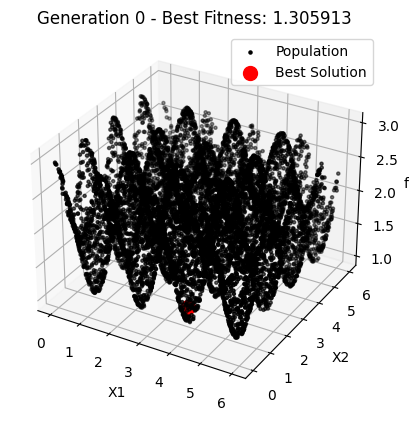

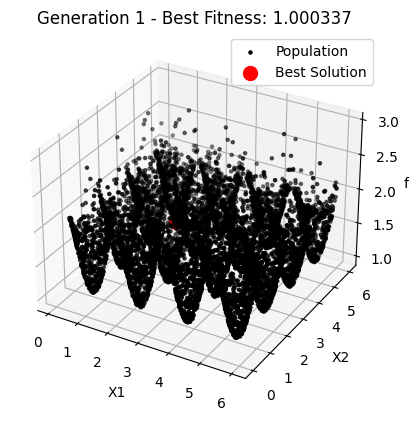

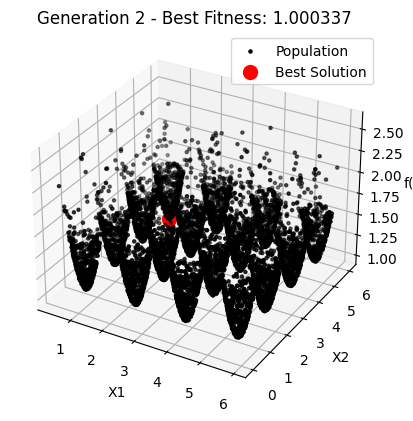

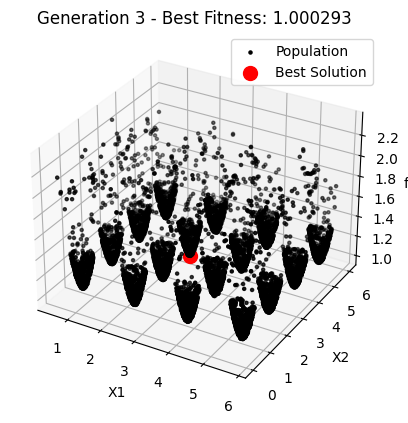

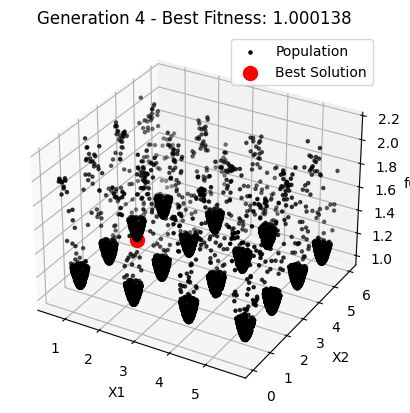

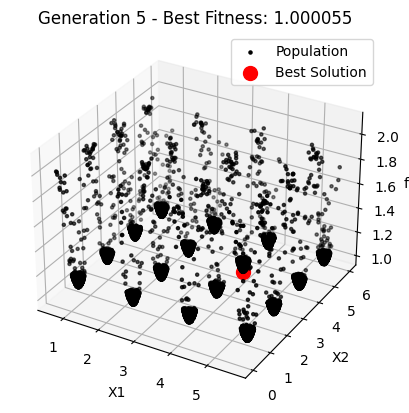

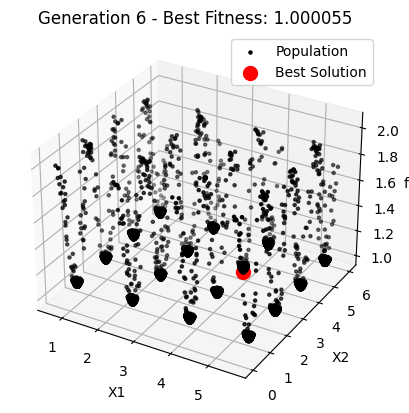

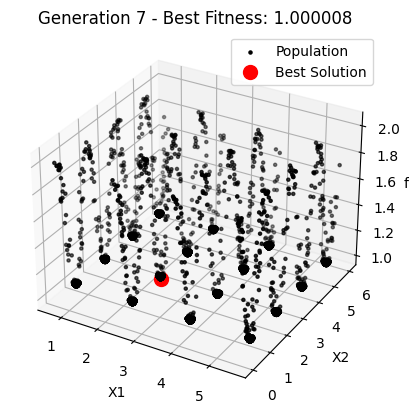

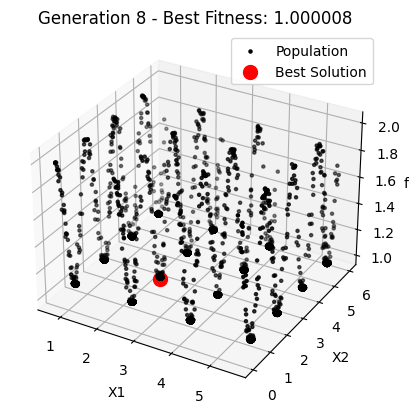

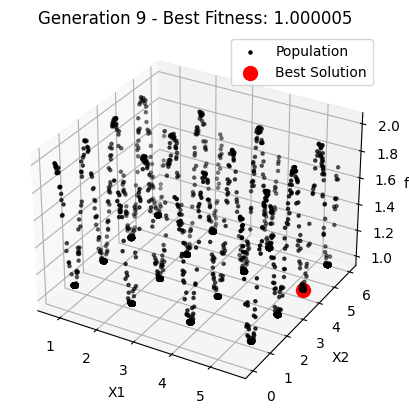

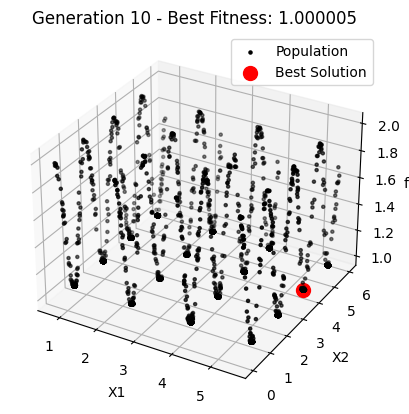

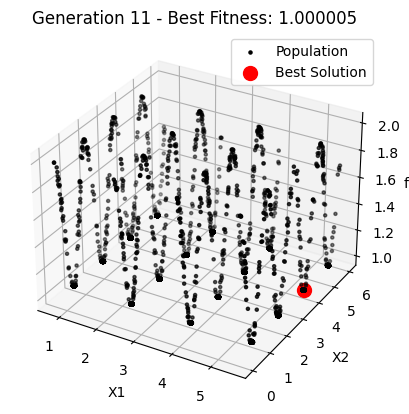

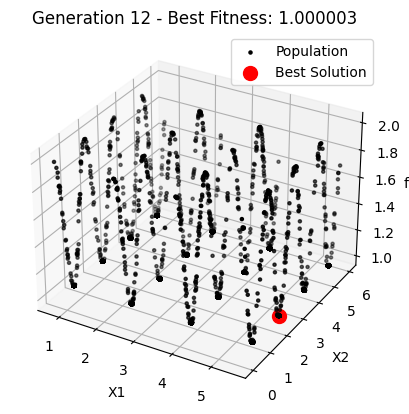

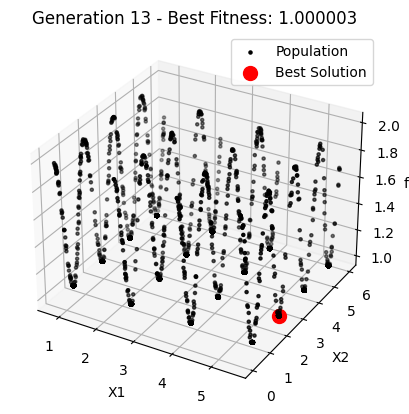

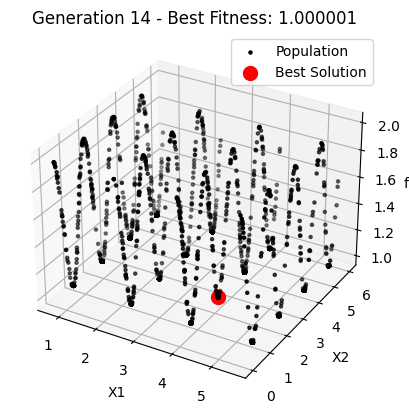

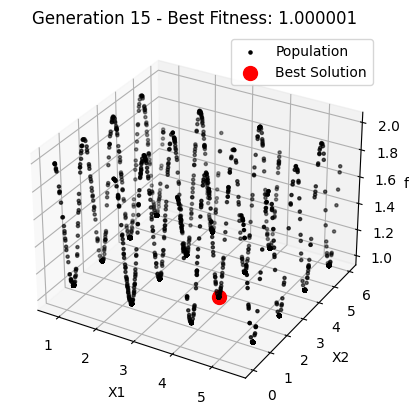

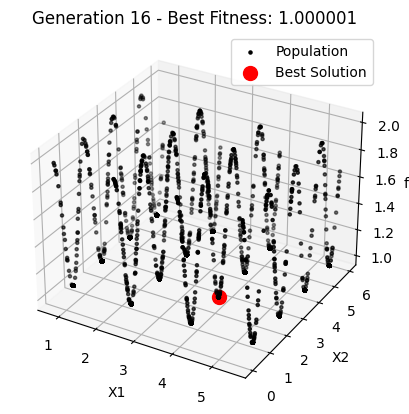

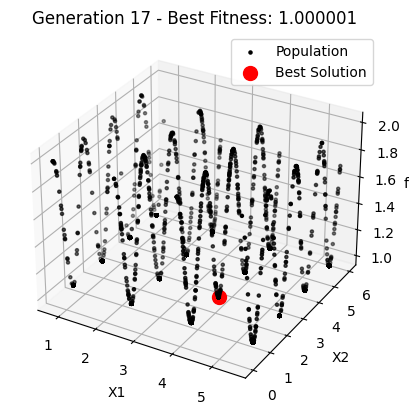

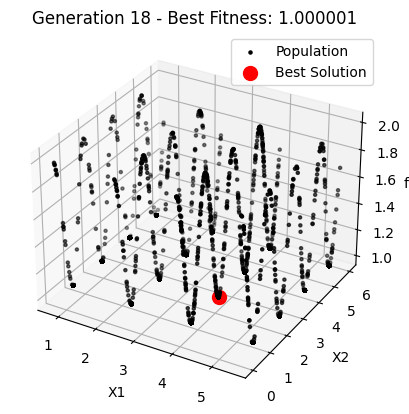

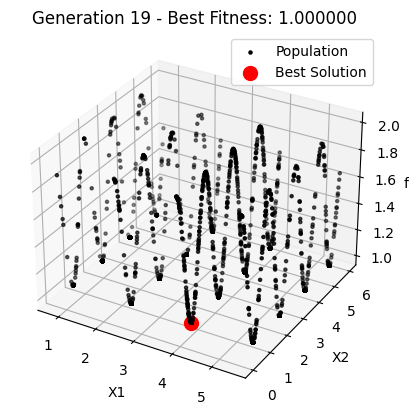

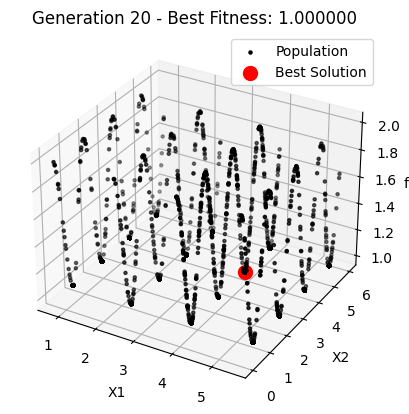

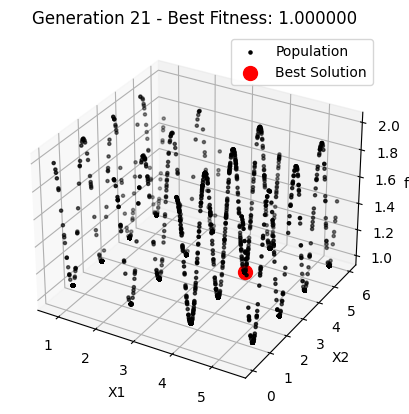

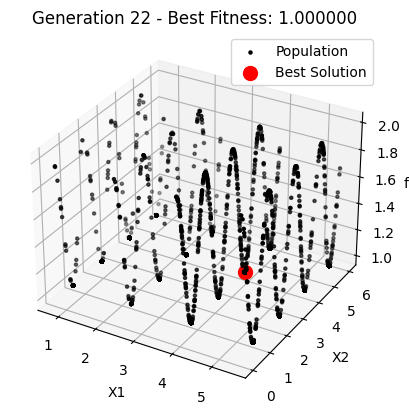

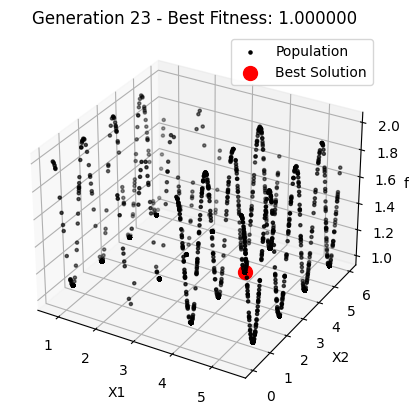

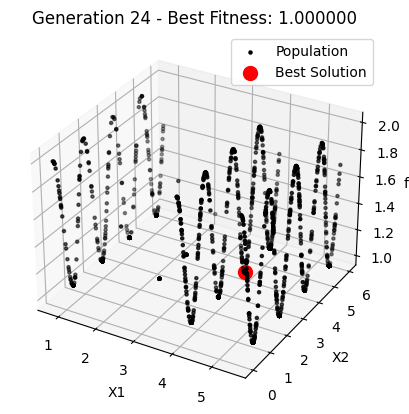

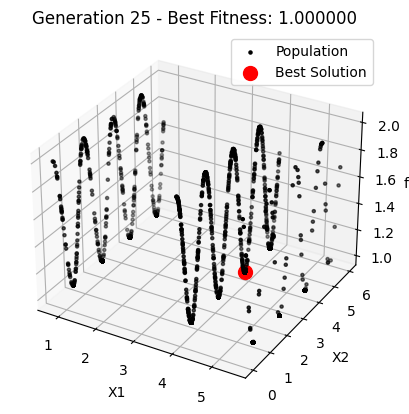

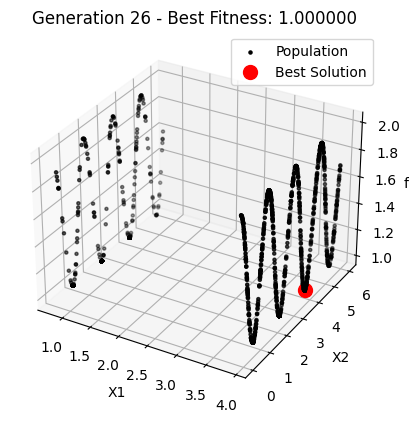

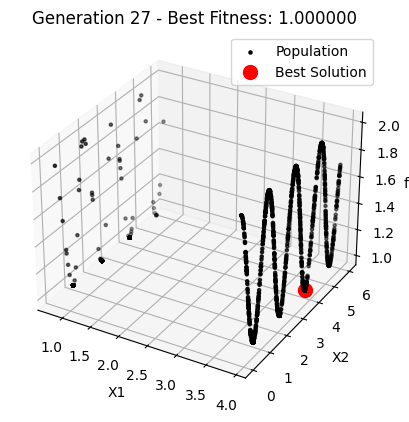

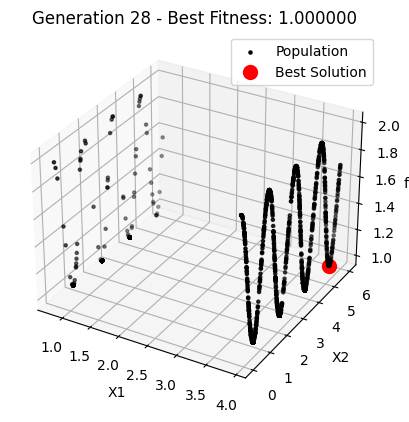

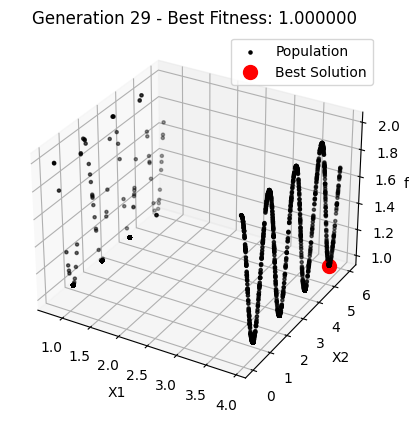

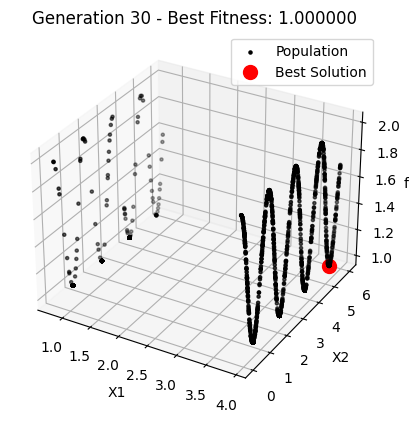

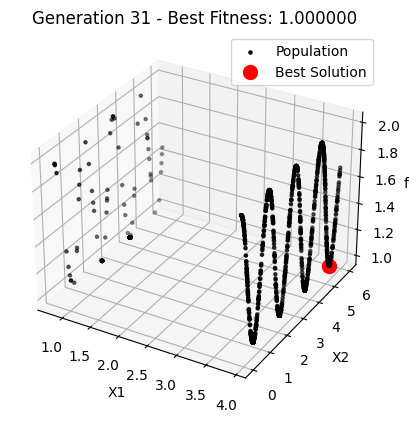

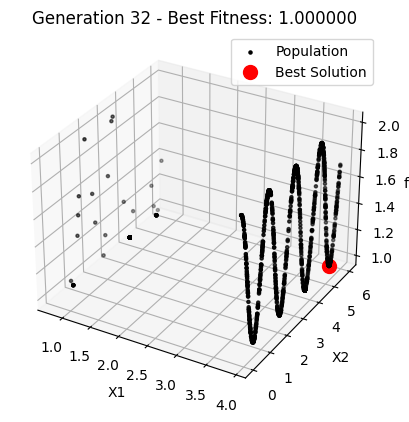

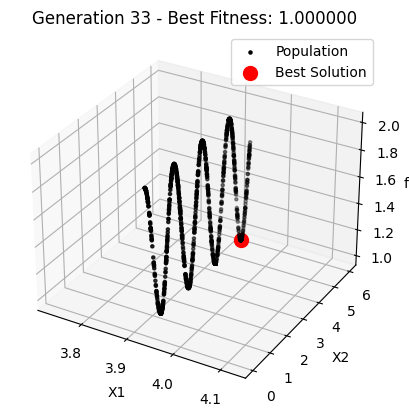

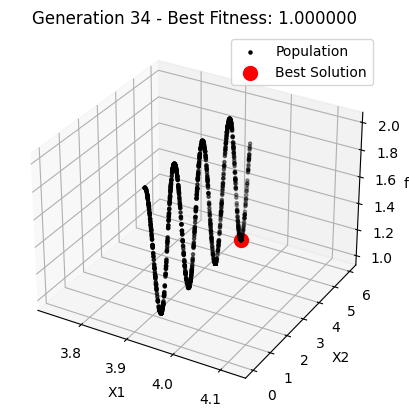

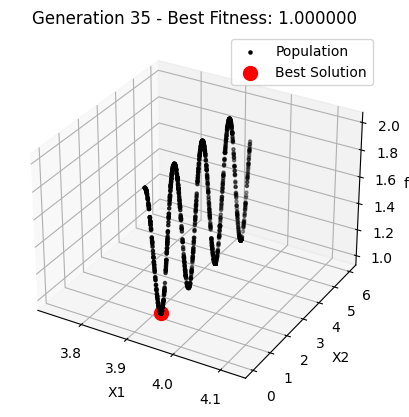

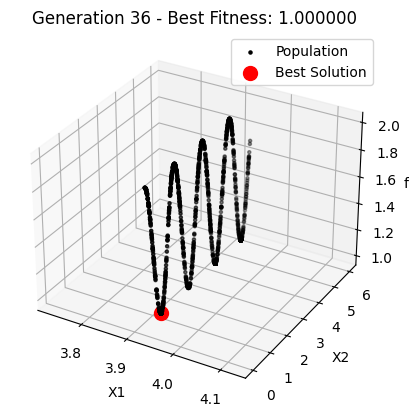

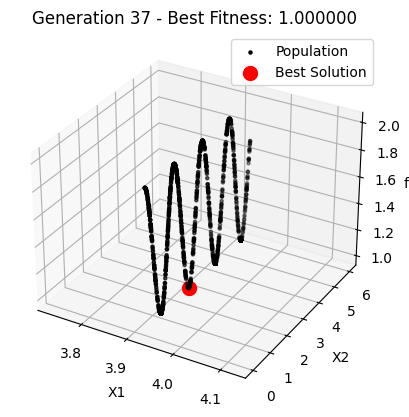

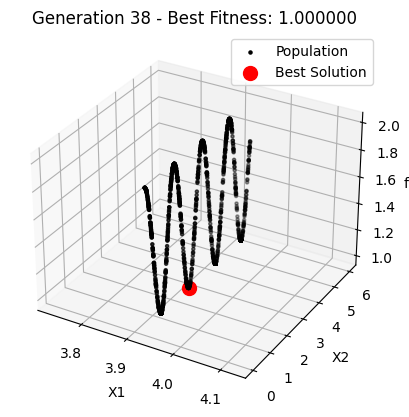

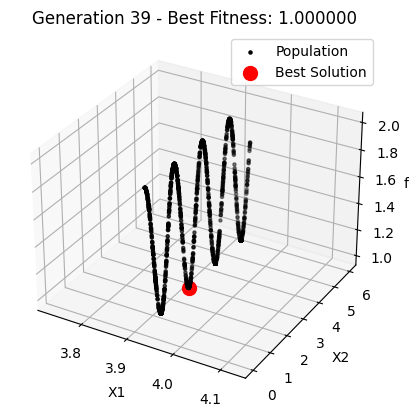

最小值: 1.0000000569262162
最优解: [3.92687163 2.3561894 ]
每个迭代步骤的最佳适应度值:
Generation 0: 1.000337277265309
Generation 1: 1.000337277265309
Generation 2: 1.000293373245933
Generation 3: 1.000137946465676
Generation 4: 1.0000549919429185
Generation 5: 1.0000549919429185
Generation 6: 1.0000079560174346
Generation 7: 1.0000079560174346
Generation 8: 1.0000054010745583
Generation 9: 1.0000054010745583
Generation 10: 1.0000054010745583
Generation 11: 1.0000027294333687
Generation 12: 1.0000027294333687
Generation 13: 1.0000006656813505
Generation 14: 1.0000006656813505
Generation 15: 1.0000006656813505
Generation 16: 1.0000006656813505
Generation 17: 1.0000006656813505
Generation 18: 1.0000002719105747
Generation 19: 1.0000000953726476
Generation 20: 1.0000000953726476
Generation 21: 1.0000000953726476
Generation 22: 1.0000000953726476
Generation 23: 1.0000000953726476
Generation 24: 1.0000000953726476
Generation 25: 1.0000000953726476
Generation 26: 1.0000000953726476
Generation 27: 1.00000007078

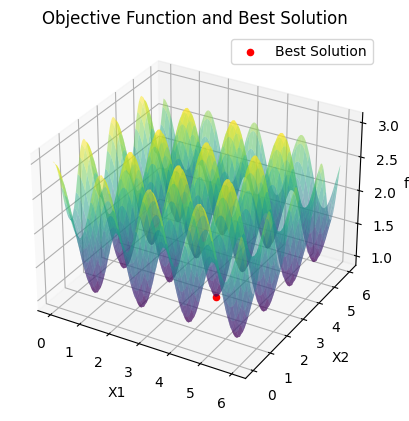

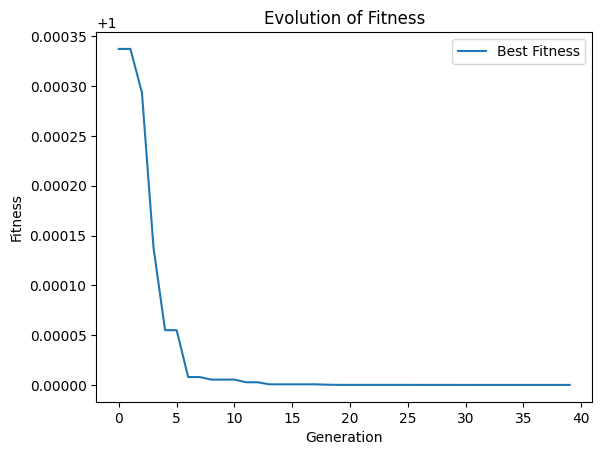

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义目标函数
def objective_function(x):
    j = 2
    return 3 - np.sin(j * x[0])**2 - np.sin(j * x[1])**2 # 3 - sin(2x1)^2 - sin(2x2)^2

# 定义选择函数
def crossover(parents_1, parents_2, crossover_rate):
    num_parents = len(parents_1) # 父母的数量
    num_crossover = int(crossover_rate * num_parents) # 选择进行交叉的父母对的数量

    # 选择进行交叉的父母对
    crossover_indices = np.random.choice(num_parents, size=num_crossover, replace=False) # 选择进行交叉的父母对的索引

    # 复制父母
    copy_parents_1 = np.copy(parents_1)
    copy_parents_2 = np.copy(parents_2)

    # 进行交叉操作
    for i in crossover_indices:
        parents_1[i][1] = copy_parents_2[i][1] # 交叉变量x2
        parents_2[i][1] = copy_parents_1[i][1] # 交叉变量x2

    return parents_1, parents_2

# 定义变异函数
def mutate(parents_1, parents_2, mutation_rate):
    num_parents = len(parents_1) # 父母的数量
    num_mutations = int(mutation_rate * num_parents) # 选择进行变异的父母对的数量

    # 选择进行变异的父母对
    mutation_indices = np.random.choice(num_parents, size=num_mutations, replace=False) # 选择进行变异的父母对的索引

    # 进行变异操作
    for i in mutation_indices:
        parents_1[i][1] = np.random.uniform(0, 6)  # 变异变量x2
        parents_2[i][1] = np.random.uniform(0, 6)  # 变异变量x2

    return parents_1, parents_2


# 定义进化算法
def evolutionary_algorithm(population_size, num_generations, mutation_rate, crossover_rate):
    bounds = [(0, 6), (0, 6)]  # 变量的取值范围

    # 保存每个迭代步骤的信息
    evolution_data = []

    # 初始化种群
    population = np.random.uniform(bounds[0][0], bounds[0][1], size=(population_size, 2))
    # 设置初始的 best_solution
    best_solution = population[0]  # 选择种群中的第一个个体作为初始值
    best_fitness = objective_function(best_solution) # 计算初始值的适应度值

    for generation in range(num_generations):
        # 计算适应度
        fitness_values = np.apply_along_axis(objective_function, 1, population)

        # 找到当前最佳解
        current_best_index = np.argmin(fitness_values)
        current_best_solution = population[current_best_index]
        current_best_fitness = fitness_values[current_best_index]


        # 绘制每次迭代的三维分布图
        fig = plt.figure() # 创建一个新的图形
        ax = fig.add_subplot(111, projection='3d') # 创建一个三维的坐标系
        ax.scatter(population[:, 0], population[:, 1], fitness_values, color='black', marker='.', label='Population') # 绘制种群的分布图
        ax.scatter(best_solution[0], best_solution[1], best_fitness, s=100, color='red', marker='o', label='Best Solution') # 绘制最佳解的分布图
        # 设置坐标轴的标签
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('f(x)')
        ax.set_title(f'Generation {generation} - Best Fitness: {best_fitness:.6f}')
        ax.legend() # 显示图例
        plt.show() # 显示图形

        # 更新全局最佳解
        if current_best_fitness < best_fitness: # 如果当前的最佳解的适应度值小于全局最佳解的适应度值
            best_solution = current_best_solution
            best_fitness = current_best_fitness

        # 保存当前迭代步骤的信息
        evolution_data.append({
            'generation': generation,
            'best_solution': best_solution,
            'best_fitness': best_fitness
        })

        # 根据适应度值确定复制的数量并且形成繁殖池
        reproduction_ratios = fitness_values / np.sum(fitness_values) # 计算每个个体的适应度值占总适应度值的比例
        sorted_index_ratios = np.argsort(reproduction_ratios) # 对比例进行排序
        half_length = len(sorted_index_ratios) // 2 # 选择前一半的个体
        first_half_index = sorted_index_ratios[:half_length] # 选择前一半的个体的索引
        new_half_population = population[first_half_index] # 选择前一半的个体
        breeding_pool = np.concatenate((new_half_population, new_half_population)) # 将前一半的个体复制一份，形成繁殖池

        # 选择父母
        parents_1 = breeding_pool[:half_length]
        parents_2 = breeding_pool[half_length:] # 先获取最后一半的父母
        parents_2 = np.flip(parents_2, axis=0) # 再将父母的顺序反转

        # 选择和交叉
        parents_1, parents_2 = crossover(parents_1, parents_2, crossover_rate)

        # 变异
        parents_1, parents_2 = mutate(parents_1, parents_2, mutation_rate)

        # 更新种群
        population = np.vstack([parents_1, parents_2])

    return best_solution, best_fitness, evolution_data


# 设置算法参数
population_size = 10000
num_generations = 40
mutation_rate = 0.1  # 变异率
crossover_rate = 0.4   # 交叉率

# 运行进化算法
best_solution, best_fitness, evolution_data = evolutionary_algorithm(population_size, num_generations, mutation_rate, crossover_rate)

# 输出结果
print("最小值:", best_fitness)
print("最优解:", best_solution)

# 输出每个迭代步骤的最佳适应度值
print("每个迭代步骤的最佳适应度值:")
for step in evolution_data:
    print(f"Generation {step['generation']}: {step['best_fitness']}")

# 可视化函数曲面和最优解
x1_vals = np.linspace(0, 6, 100)
x2_vals = np.linspace(0, 6, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = 3 - np.sin(2 * X1)**2 - np.sin(2 * X2)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis')
ax.scatter(best_solution[0], best_solution[1], best_fitness, color='red', marker='o', label='Best Solution')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(x)')
ax.set_title('Objective Function and Best Solution')
ax.legend()

# 绘制适应度值的变化曲线
evolution_df = pd.DataFrame(evolution_data)
plt.figure()
plt.plot(evolution_df['generation'], evolution_df['best_fitness'], label='Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of Fitness')
plt.legend()

plt.show()


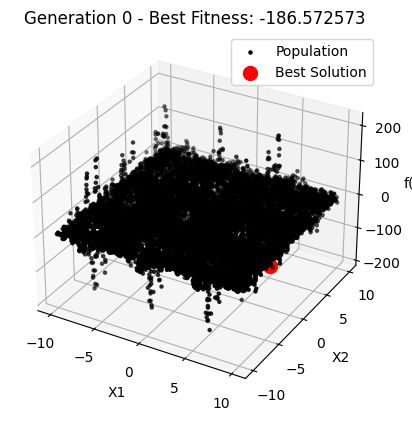

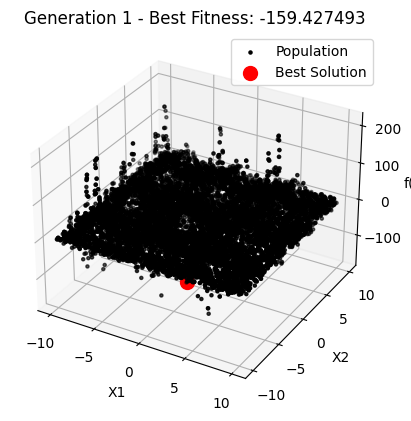

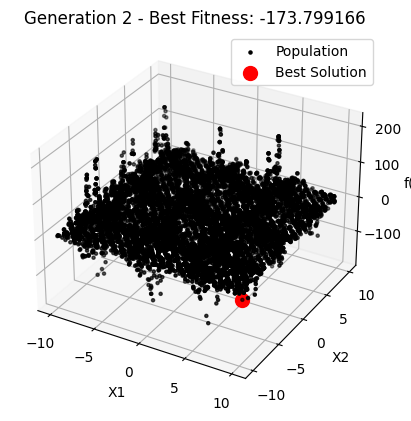

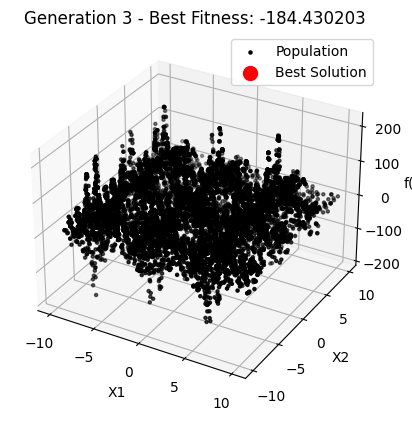

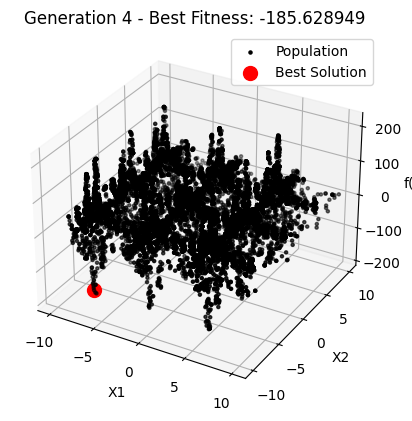

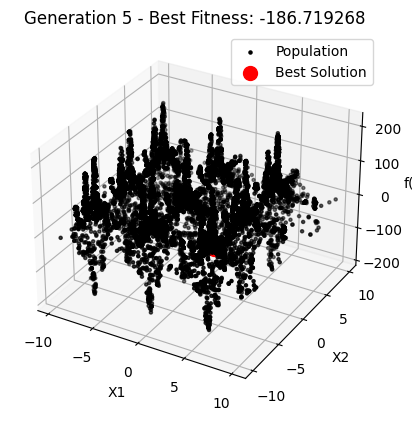

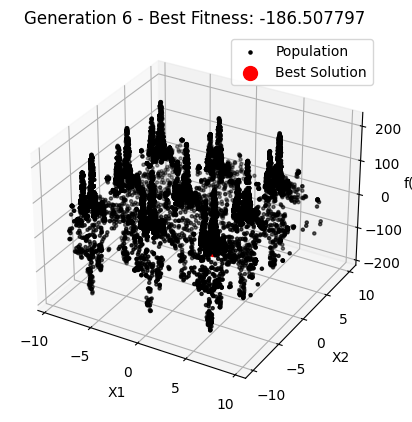

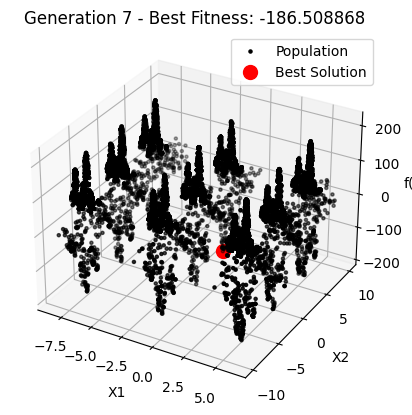

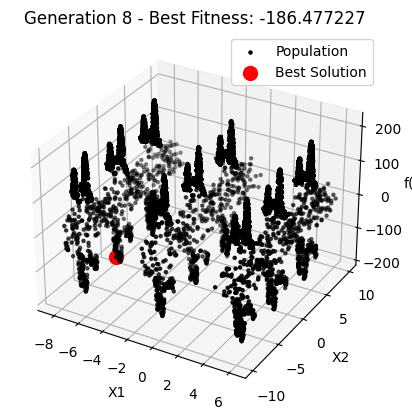

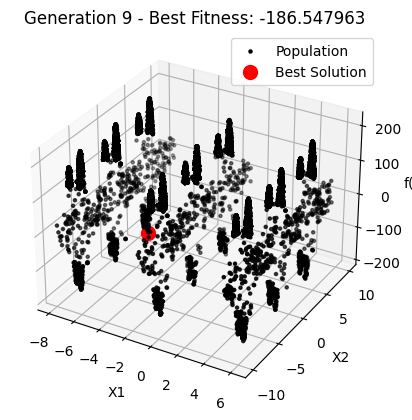

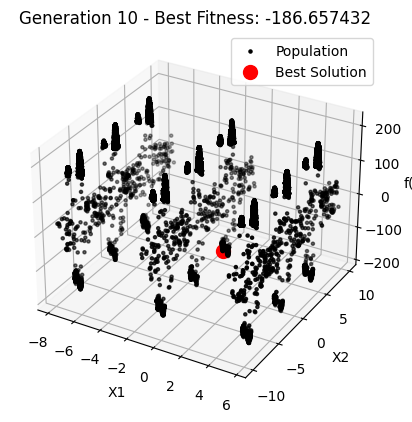

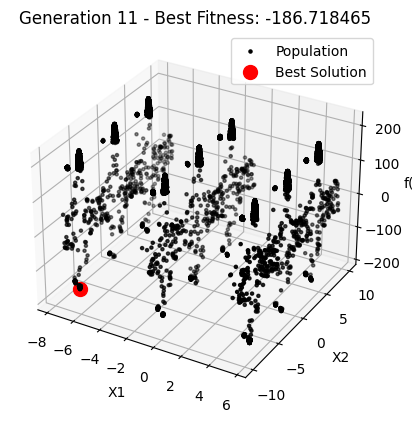

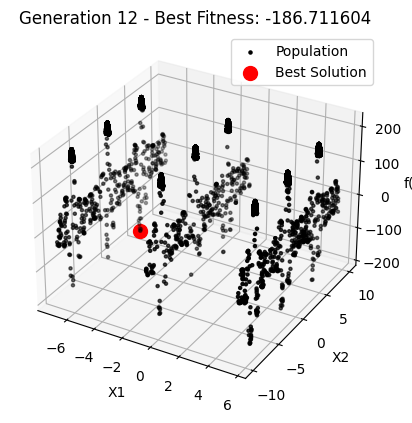

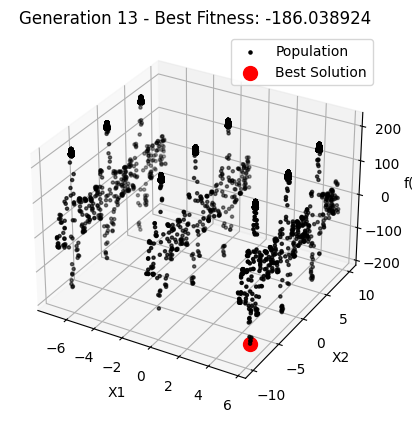

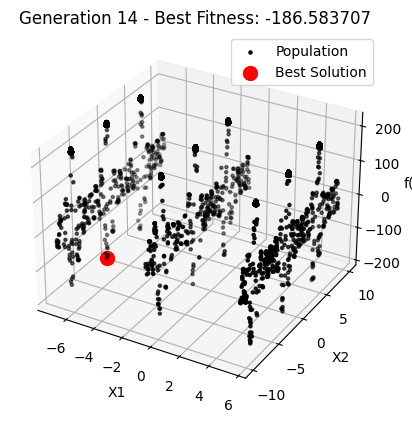

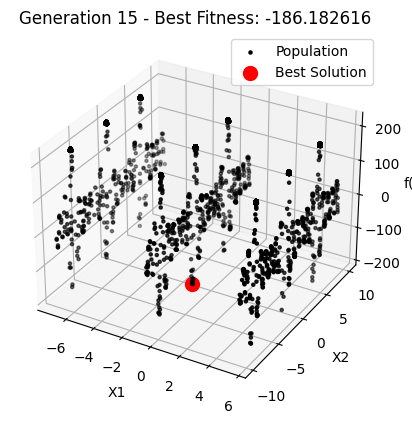

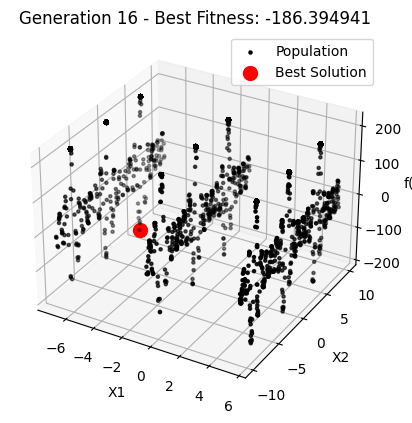

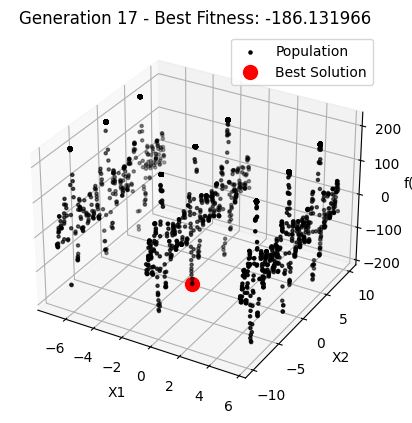

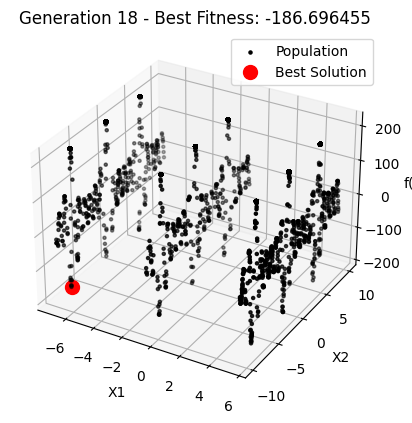

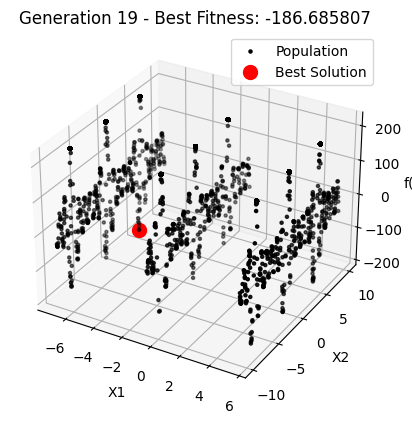

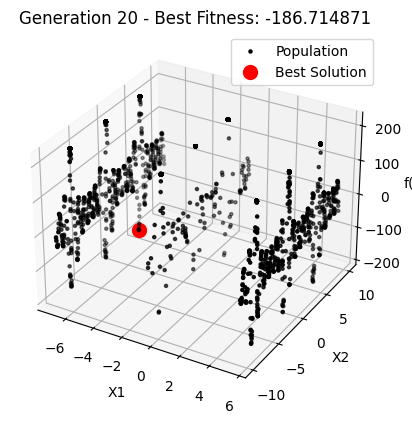

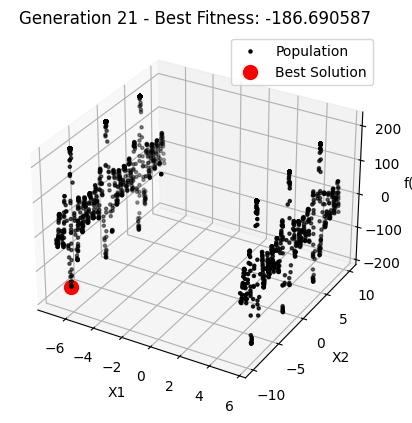

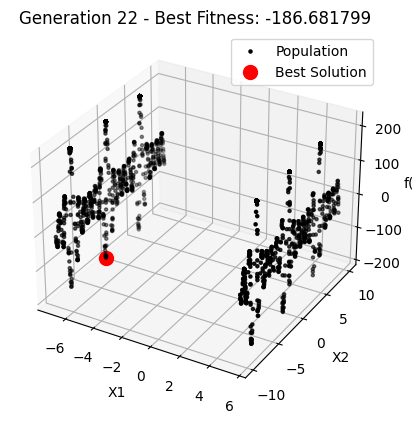

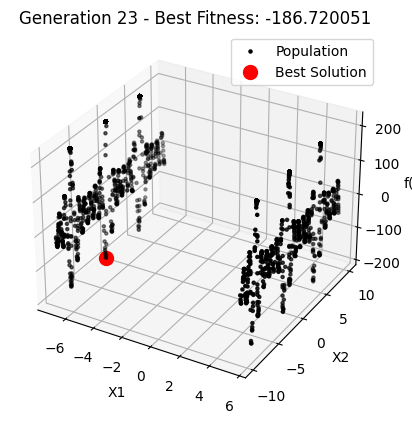

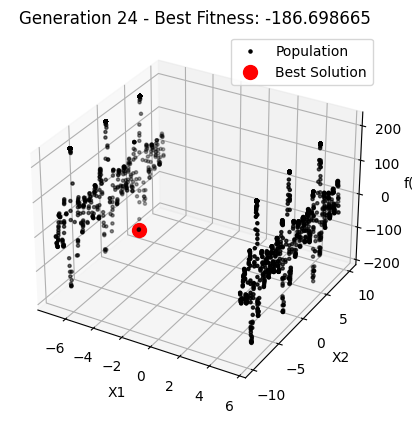

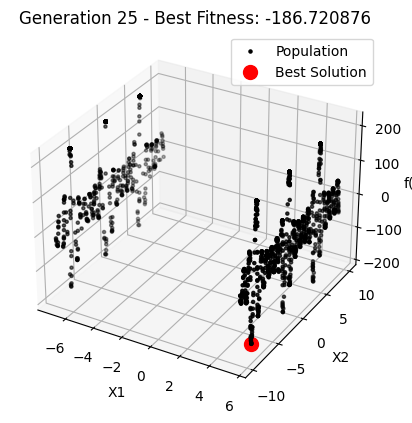

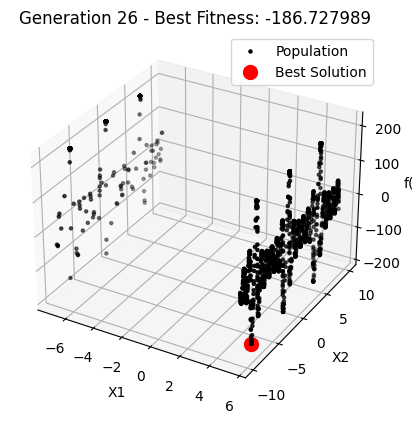

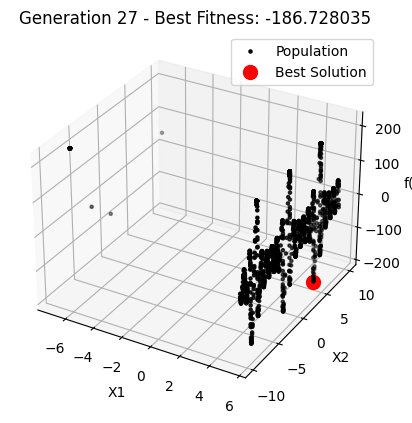

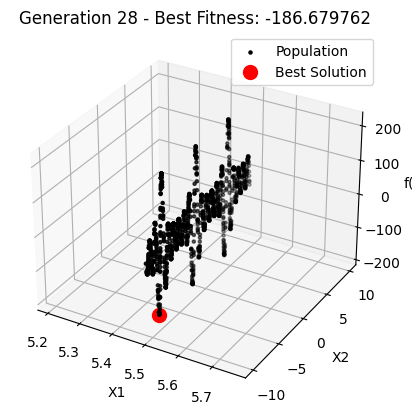

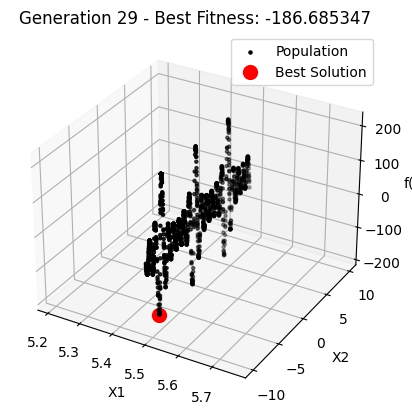

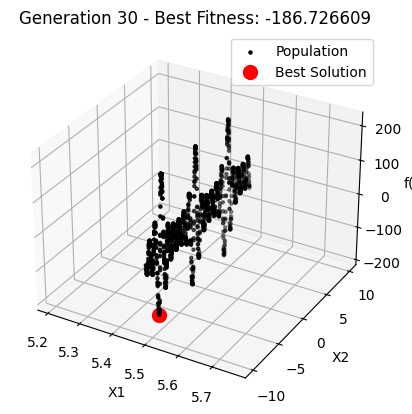

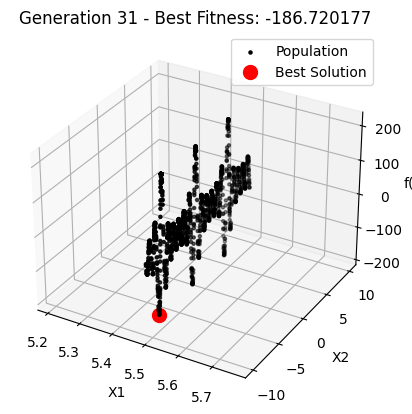

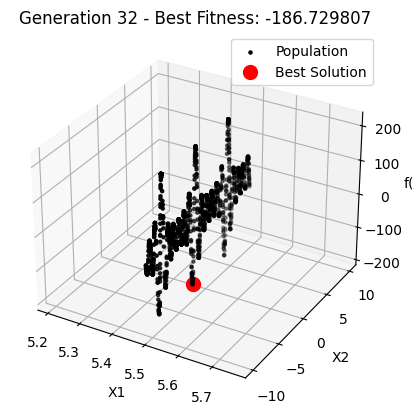

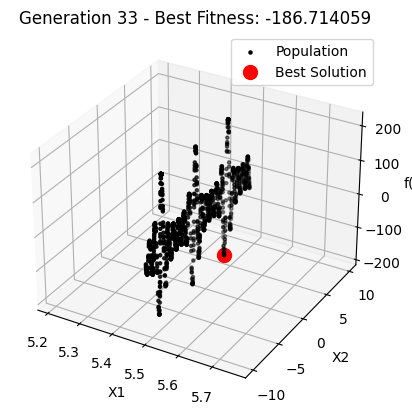

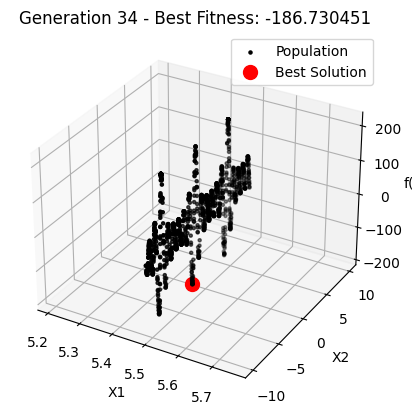

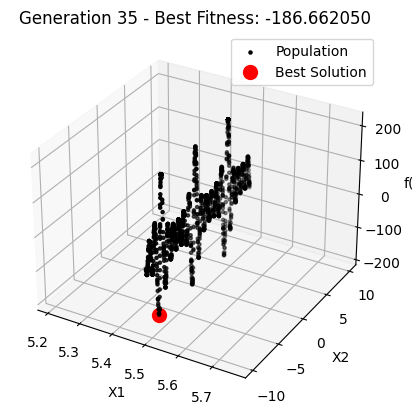

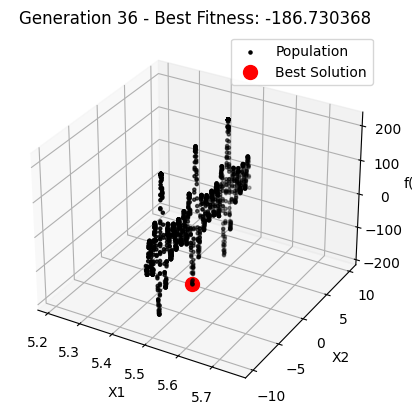

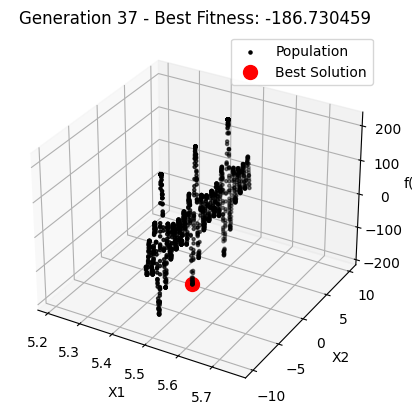

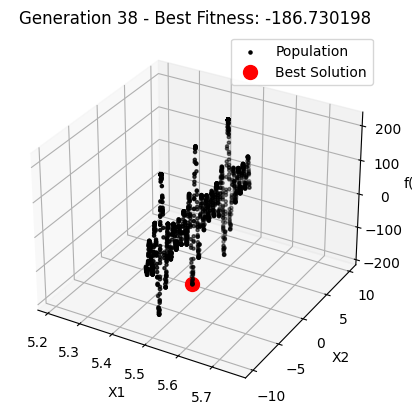

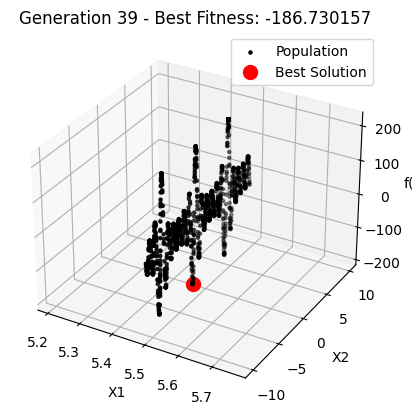

最小值: -186.7304589378859
最优解: [ 5.48241794 -1.42506365]
每个迭代步骤的最佳适应度值:
Generation 0: -186.57257296572865
Generation 1: -186.57257296572865
Generation 2: -186.57257296572865
Generation 3: -186.57257296572865
Generation 4: -186.57257296572865
Generation 5: -186.71926825157638
Generation 6: -186.71926825157638
Generation 7: -186.71926825157638
Generation 8: -186.71926825157638
Generation 9: -186.71926825157638
Generation 10: -186.71926825157638
Generation 11: -186.71926825157638
Generation 12: -186.71926825157638
Generation 13: -186.71926825157638
Generation 14: -186.71926825157638
Generation 15: -186.71926825157638
Generation 16: -186.71926825157638
Generation 17: -186.71926825157638
Generation 18: -186.71926825157638
Generation 19: -186.71926825157638
Generation 20: -186.71926825157638
Generation 21: -186.71926825157638
Generation 22: -186.71926825157638
Generation 23: -186.72005083450603
Generation 24: -186.72005083450603
Generation 25: -186.7208760605129
Generation 26: -186.72798897038

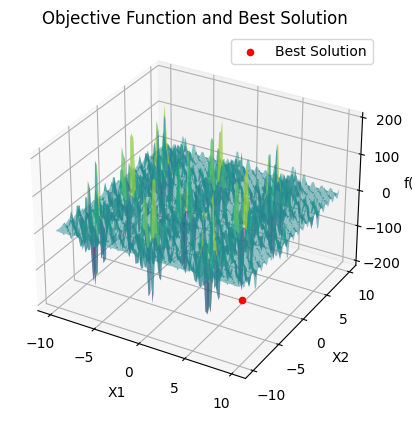

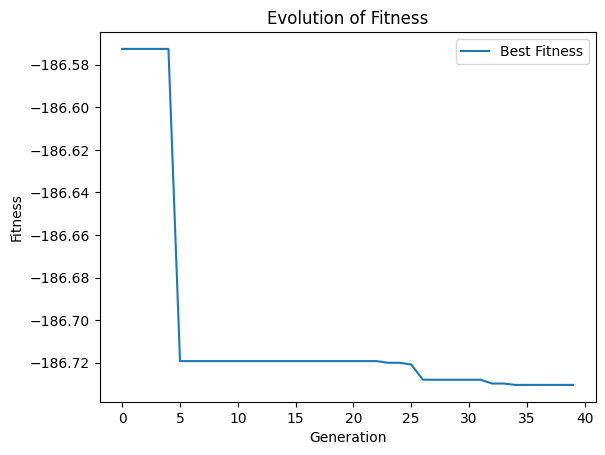

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义目标函数
def objective_function(x):
    result = 1
    for i in range(1, 3):
        inner_sum = 0
        for j in range(1, 6):
            inner_sum += j * np.cos((j + 1) * x[i - 1] + j)
        result *= inner_sum
    return result

# 定义选择函数
def crossover(parents_1, parents_2, crossover_rate):
    num_parents = len(parents_1) # 父母的数量
    num_crossover = int(crossover_rate * num_parents) # 选择进行交叉的父母对的数量

    # 选择进行交叉的父母对
    crossover_indices = np.random.choice(num_parents, size=num_crossover, replace=False) # 选择进行交叉的父母对的索引

    # 复制父母
    copy_parents_1 = np.copy(parents_1)
    copy_parents_2 = np.copy(parents_2)

    # 进行交叉操作
    for i in crossover_indices:
        parents_1[i][1] = copy_parents_2[i][1] # 交叉变量x2
        parents_2[i][1] = copy_parents_1[i][1] # 交叉变量x2

    return parents_1, parents_2

# 定义变异函数
def mutate(parents_1, parents_2, mutation_rate):
    num_parents = len(parents_1) # 父母的数量
    num_mutations = int(mutation_rate * num_parents) # 选择进行变异的父母对的数量

    # 选择进行变异的父母对
    mutation_indices = np.random.choice(num_parents, size=num_mutations, replace=False) # 选择进行变异的父母对的索引

    # 进行变异操作
    for i in mutation_indices:
        parents_1[i][1] = np.random.uniform(-10, 10)  # 变异变量x2
        parents_2[i][1] = np.random.uniform(-10, 10)  # 变异变量x2

    return parents_1, parents_2


# 定义进化算法
def evolutionary_algorithm(population_size, num_generations, mutation_rate, crossover_rate):
    bounds = [(-10, 10), (-10, 10)]  # 变量的取值范围

    # 保存每个迭代步骤的信息
    evolution_data = []

    # 初始化种群
    population = np.random.uniform(bounds[0][0], bounds[0][1], size=(population_size, 2))
    # 设置初始的 best_solution
    best_solution = population[0]  # 选择种群中的第一个个体作为初始值
    best_fitness = objective_function(best_solution) # 计算初始值的适应度值

    for generation in range(num_generations):
        # 计算适应度
        fitness_values = np.apply_along_axis(objective_function, 1, population)

        # 找到当前最佳解
        current_best_index = np.argmin(fitness_values)
        current_best_solution = population[current_best_index]
        current_best_fitness = fitness_values[current_best_index]


        # 绘制每次迭代的三维分布图
        fig = plt.figure() # 创建一个新的图形
        ax = fig.add_subplot(111, projection='3d') # 创建一个三维的坐标系
        ax.scatter(population[:, 0], population[:, 1], fitness_values, color='black', marker='.', label='Population') # 绘制种群的分布图
        ax.scatter(current_best_solution[0], current_best_solution[1], current_best_fitness, s=100, color='red', marker='o', label='Best Solution') # 绘制最佳解的分布图
        # 设置坐标轴的标签
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('f(x)')
        ax.set_title(f'Generation {generation} - Best Fitness: {current_best_fitness:.6f}')
        ax.legend() # 显示图例
        plt.show() # 显示图形

        # 更新全局最佳解
        if current_best_fitness < best_fitness: # 如果当前的最佳解的适应度值小于全局最佳解的适应度值
            best_solution = current_best_solution
            best_fitness = current_best_fitness

        # 保存当前迭代步骤的信息
        evolution_data.append({
            'generation': generation,
            'best_solution': best_solution,
            'best_fitness': best_fitness
        })

        # 根据适应度值确定复制的数量并且形成繁殖池
        reproduction_ratios = fitness_values / np.sum(fitness_values) # 计算每个个体的适应度值占总适应度值的比例
        sorted_index_ratios = np.argsort(reproduction_ratios) # 对比例进行排序
        half_length = len(sorted_index_ratios) // 2 # 选择后一半的个体
        first_half_index = sorted_index_ratios[half_length:] # 选择后一半的个体的索引
        new_half_population = population[first_half_index] # 选择后一半的个体
        breeding_pool = np.concatenate((new_half_population, new_half_population)) # 将后一半的个体复制一份，形成繁殖池

        # 选择父母
        parents_1 = breeding_pool[:half_length]
        parents_2 = breeding_pool[half_length:] # 先获取最后一半的父母
        parents_2 = np.flip(parents_2, axis=0) # 再将父母的顺序反转

        # 选择和交叉
        parents_1, parents_2 = crossover(parents_1, parents_2, crossover_rate)

        # 变异
        parents_1, parents_2 = mutate(parents_1, parents_2, mutation_rate)

        # 更新种群
        population = np.vstack([parents_1, parents_2])

    return best_solution, best_fitness, evolution_data


# 设置算法参数
population_size = 15000
num_generations = 40
mutation_rate = 0.08  # 变异率
crossover_rate = 0.2   # 交叉率

# 运行进化算法
best_solution, best_fitness, evolution_data = evolutionary_algorithm(population_size, num_generations, mutation_rate, crossover_rate)

# 输出结果
print("最小值:", best_fitness)
print("最优解:", best_solution)

# 输出每个迭代步骤的最佳适应度值
print("每个迭代步骤的最佳适应度值:")
for step in evolution_data:
    print(f"Generation {step['generation']}: {step['best_fitness']}")

# 可视化函数曲面和最优解
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = np.zeros_like(X1)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = objective_function([X1[i, j], X2[i, j]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis')
ax.scatter(best_solution[0], best_solution[1], best_fitness, color='red', marker='o', label='Best Solution')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(x)')
ax.set_title('Objective Function and Best Solution')
ax.legend()

# 绘制适应度值的变化曲线
evolution_df = pd.DataFrame(evolution_data)
plt.figure()
plt.plot(evolution_df['generation'], evolution_df['best_fitness'], label='Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of Fitness')
plt.legend()

plt.show()
